In [125]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline

# may need to change this line to match your local dir
FEATURE_PATH = './Data/Processed/train_features.csv'
TEST_FEATURE_PATH = './Data/Processed/test_features.csv'
WINDOW_SIZE = 2 #seconds

data = pd.read_csv(FEATURE_PATH)
test_data = pd.read_csv(TEST_FEATURE_PATH)
test_data = test_data.dropna(axis=1)

features = ['result_acc_mean', 'result_acc_median', 'result_acc_std', 'result_lin_acc_mean', 'result_lin_acc_median', 'result_lin_acc_std']

labels = ['standing', 'sitting', 'walking', 'laying_down']

def plot_data(label, feature):
    specific_data = data[data['label_x'] == label]
    #get a slice
    
    first_idx = 0
    count = 0
    # b.plot(subplots=True)
    idx = 1
    while True:
#         print(count)
        count = count + 1
        val = specific_data['timestamp_sec'].iloc[first_idx]
        date = datetime.datetime.fromtimestamp(val).strftime('%Y-%m-%d %H:%M:%S')
#         print(date)
        while val + WINDOW_SIZE == specific_data['timestamp_sec'].iloc[idx]:
            val = specific_data['timestamp_sec'].iloc[idx]
            idx = idx + 1
            if idx == len(specific_data):
                break

        last_idx = idx
#         print('plotting ', first_idx, ' ', last_idx)
        c = specific_data[first_idx:last_idx].plot(x = 'timestamp_sec', y= feature, title='result_acc_mean for ' + label + ', session ' + str(count) + '\n' + date)

        first_idx = idx
        idx = idx + 1
        if idx >= len(specific_data):
            break
            
def plot_test_data(label, feature):
    specific_data = test_data[test_data['label_x'] == label]
    #get a slice
    
    first_idx = 0
    count = 0
    # b.plot(subplots=True)
    idx = 1
    while True:
#         print(count)
        count = count + 1
        val = specific_data['timestamp_sec'].iloc[first_idx]
        date = datetime.datetime.fromtimestamp(val).strftime('%Y-%m-%d %H:%M:%S')
#         print(date)
        while val + WINDOW_SIZE == specific_data['timestamp_sec'].iloc[idx]:
            val = specific_data['timestamp_sec'].iloc[idx]
            idx = idx + 1
            if idx == len(specific_data):
                break

        last_idx = idx
#         print('plotting ', first_idx, ' ', last_idx)
        c = specific_data[first_idx:last_idx].plot(x = 'timestamp_sec', y= feature, title='result_acc_mean for ' + label + ', session ' + str(count) + '\n' + date)

        first_idx = idx
        idx = idx + 1
        if idx >= len(specific_data):
            break

data = data.drop(columns=['steps_mean', 'steps_std'])
# print(len(test_data.keys()))
# print(len(data.keys()))
test_data.keys()

Index(['timestamp_sec', 'result_acc_mean', 'result_acc_median',
       'result_acc_std', 'result_acc_max', 'result_acc_min',
       'result_acc_cross_median', 'result_lin_acc_mean',
       'result_lin_acc_median', 'result_lin_acc_std', 'result_lin_acc_max',
       'result_lin_acc_min', 'lin_timestep', 'timestep', 'tot_lin_pow',
       'fst_dom_lin_freq', 'fst_dom_lin_pow', 'snd_dom_lin_freq',
       'snd_dom_lin_pow', 'third_dom_lin_freq', 'third_dom_lin_pow',
       'ratio_lin', 'tot_pow', 'fst_dom_freq', 'fst_dom_pow', 'snd_dom_freq',
       'snd_dom_pow', 'third_dom_freq', 'third_dom_pow', 'ratio', 'cat_label',
       'label_x', 'result_orient_mean', 'result_orient_median', 'label_y'],
      dtype='object')

In [126]:
data.head()

,timestamp_sec,result_acc_mean,result_acc_median,result_acc_std,result_acc_max,result_acc_min,result_acc_cross_median,result_lin_acc_mean,result_lin_acc_median,result_lin_acc_std,...,snd_dom_pow,third_dom_freq,third_dom_pow,ratio,cat_label,label_x,result_orient_mean,result_orient_median,result_orient_std,label_y
0,1520488780,10.094724,10.030008,1.816837,14.553851,5.544164,27,2.221156,1.473088,2.035813,...,1.307175,0.980469,2.900690,0.831290,1,sitting,294.78174,290.18756,9.900086,sitting
1,1520488782,10.072203,9.967880,0.904079,14.187375,6.141875,57,0.747039,0.320767,1.110045,...,0.001928,0.972656,0.000404,0.183420,1,sitting,290.75507,290.91452,1.334639,sitting
2,1520488784,9.623530,9.708787,1.117842,12.289062,5.421423,39,1.008361,0.525829,1.186360,...,0.087046,0.976562,0.087046,0.237749,1,sitting,309.19600,309.71826,1.788070,sitting
3,1520488786,9.934544,9.923831,0.292970,12.262693,7.401988,80,0.386284,0.288372,0.339844,...,0.001555,1.957031,0.000533,0.187646,1,sitting,311.46503,311.49536,0.165621,sitting
4,1520488788,9.788693,9.897487,0.959285,12.883348,6.882495,31,1.238341,1.022353,0.864420,...,0.051182,0.970703,0.110726,0.420275,1,sitting,320.41254,311.52017,14.757617,sitting


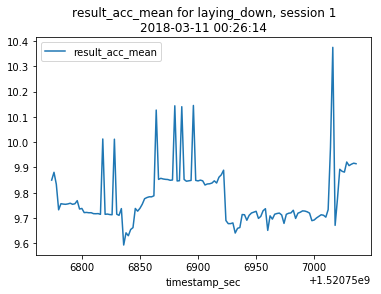

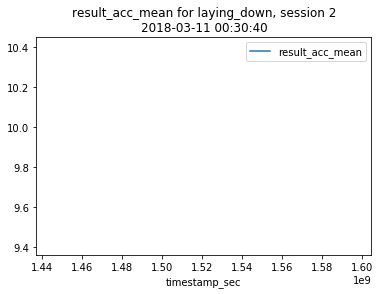

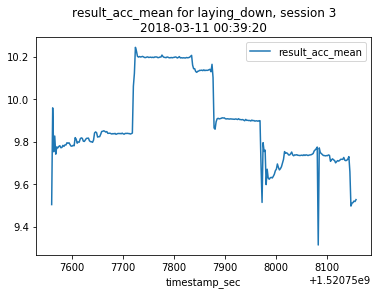

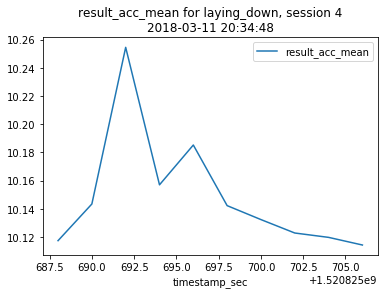

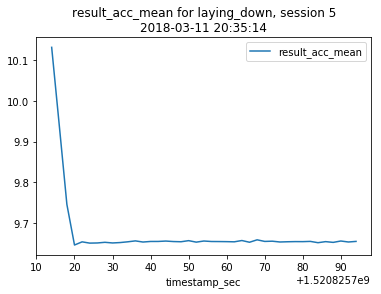

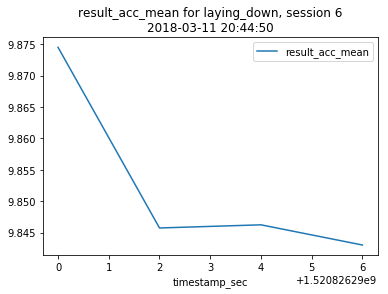

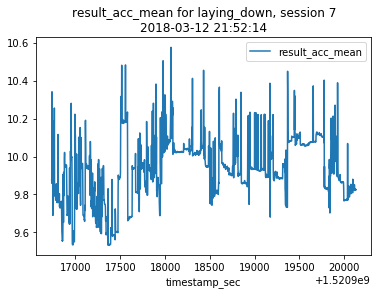

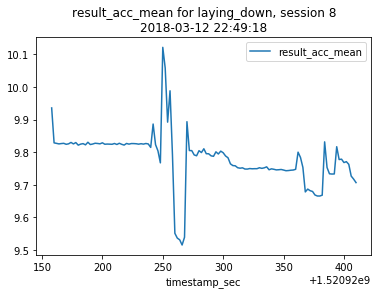

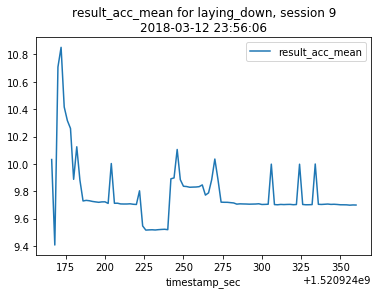

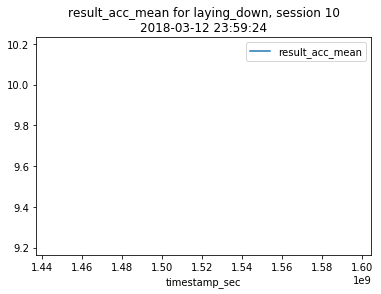

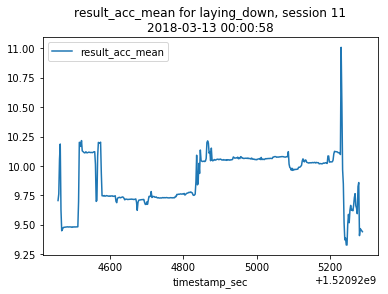

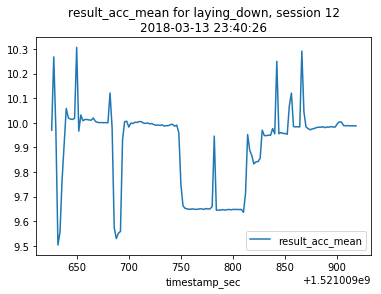

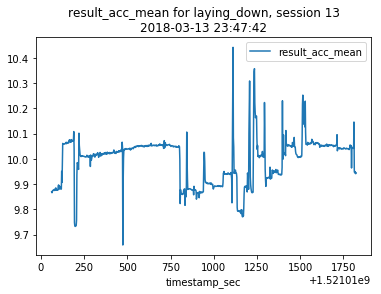

In [127]:
plot_data(labels[3], features[0])


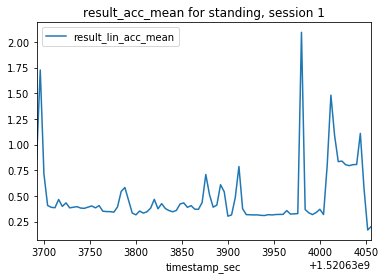

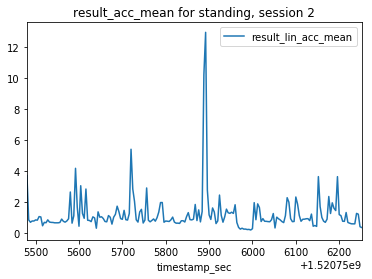

In [9]:
plot_data(labels[0], features[3])

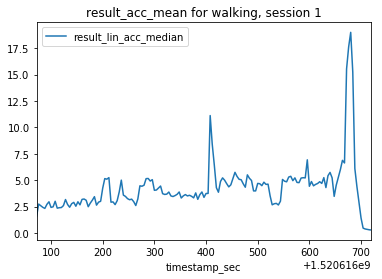

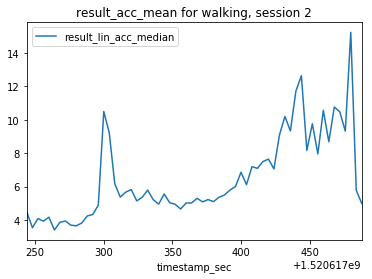

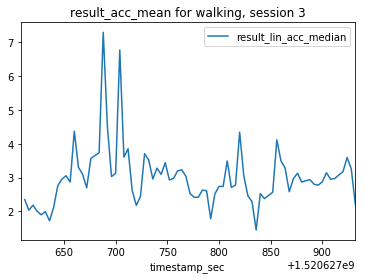

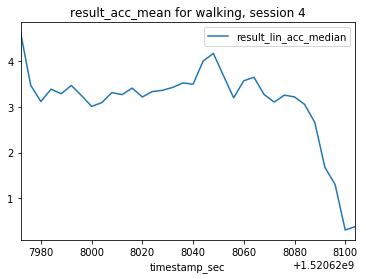

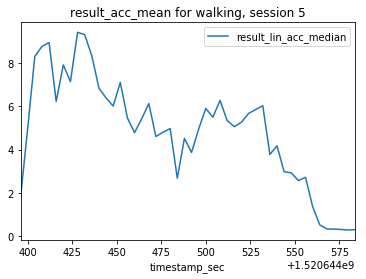

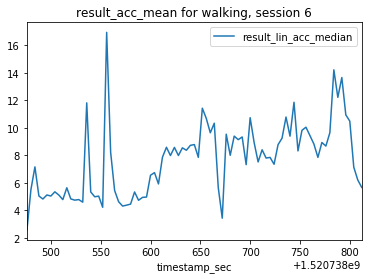

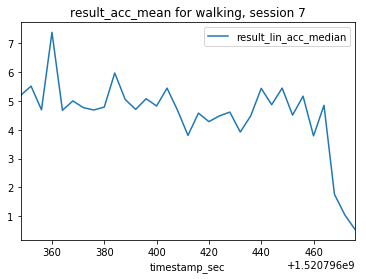

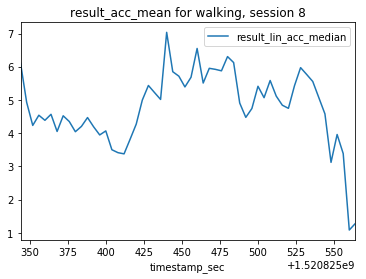

In [10]:
plot_data(labels[2], features[4])

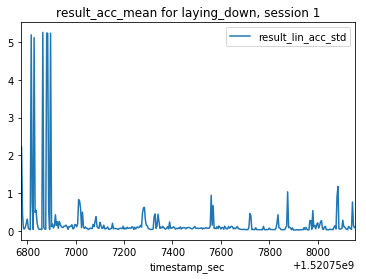

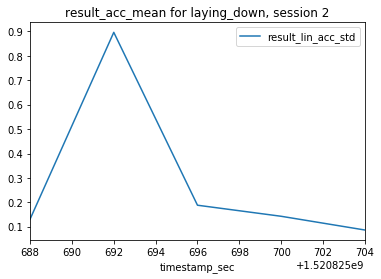

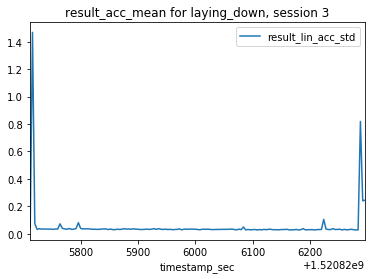

In [11]:
plot_data(labels[3], features[5])

In [2]:
pd.__version__

'0.22.0'

In [128]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

feature_keys = ['result_acc_mean', 'result_acc_median',
       'result_acc_std', 'result_acc_max', 'result_acc_min',
       'result_acc_cross_median', 'result_lin_acc_mean',
       'result_lin_acc_median', 'result_lin_acc_std', 'result_lin_acc_max',
       'result_lin_acc_min', 'tot_lin_pow',
       'fst_dom_lin_freq', 'fst_dom_lin_pow', 'snd_dom_lin_freq',
       'snd_dom_lin_pow', 'third_dom_lin_freq', 'third_dom_lin_pow',
       'ratio_lin', 'tot_pow', 'fst_dom_freq', 'fst_dom_pow', 'snd_dom_freq',
       'snd_dom_pow', 'third_dom_freq', 'third_dom_pow', 'ratio',
        'result_orient_mean', 'result_orient_median']

data = data.dropna()
data = data[data.label_x != 'unknown']
data = data[data.label_x != 'null']
data_label = data['label_x']
test_label = test_data['label_x']
data_data = data[feature_keys]
test_data_data = test_data[feature_keys]


data_norm = (data_data - data_data.mean()) / (data_data.max() - data_data.min())
test_norm = (test_data_data - test_data_data.mean()) / (test_data_data.max() - test_data_data.min())
data_train = data_norm
data_test = test_norm
# data = data.sample(frac=1)



# data_train, data_test = train_test_split(data, test_size = 0.2)

clf = svm.SVC(class_weight = 'balanced')
features = data_train[feature_keys].values.astype('float64')
# features = StandardScaler().fit_transform(features)
labels =  data_label #data_train['label_x'].values.astype('str')
# new_labels = labels.replace(['sitting', 'standing', 'walking', 'laying_down'], [0,1,2,3])


clf.fit(features, labels)
# dec = decision_function([[1]])
prediction = clf.predict(data_test[feature_keys].values.astype('float64'))

num_correct = 0
num_total = len(prediction)
num_sitting = 0

y_true = []

for (idx, val) in enumerate(test_label):
    pred = prediction[idx]
    if val == 'sitting':
        num_sitting = num_sitting + 1
    if pred == val:
        num_correct = num_correct + 1

print('accuracy: ', num_correct / num_total)
print('sitting: ', num_sitting / num_total)

confusion_matrix(test_label, prediction, labels=['sitting', 'standing', 'walking', 'laying_down'])


accuracy:  0.7765273311897106
sitting:  0.19292604501607716


array([[ 76,  24,   4,  16],
       [ 31,  76,   6,   4],
       [  0,   2, 155,   0],
       [ 31,  12,   9, 176]])

In [59]:
test = features
labels_test = data_train['label_x'].replace(['sitting', 'standing', 'walking', 'laying_down'], ['red','green','blue','purple']).iloc[1:1000]
import matplotlib.pyplot as plt
a = np.zeros(len(test))
feature_idx = feature_keys.index('fst_dom_freq')
feature_idx2 = feature_keys.index('snd_dom_freq')

plt.scatter(test[:,feature_idx], test[:,feature_idx2] , c = labels_test)

ValueError: 'fst_dom_freq' is not in list

In [74]:
data_norm.head()


,result_acc_cross_median,result_lin_acc_mean,result_lin_acc_median,result_lin_acc_std,result_lin_acc_max,result_lin_acc_min,tot_lin_pow,fst_dom_lin_freq,fst_dom_lin_pow,snd_dom_lin_freq,snd_dom_lin_pow,third_dom_lin_freq,third_dom_lin_pow,ratio_lin
9100,-0.114801,-0.023496,-0.020575,-0.036247,-0.020082,-0.010808,-0.010248,-0.119792,-0.007787,-0.104003,-0.006920,0.318697,-0.007258,-0.078021
14072,-0.098407,-0.041673,-0.044212,-0.024775,-0.021972,-0.018596,-0.009617,-0.204786,-0.007110,-0.206643,-0.006436,-0.330480,-0.006580,0.029300
13816,0.110609,-0.046192,-0.042688,-0.046271,-0.026669,-0.011943,-0.010864,-0.203574,-0.007967,-0.204218,-0.007235,-0.321221,-0.007438,-0.021551
4707,0.192576,-0.044346,-0.040045,-0.049740,-0.027996,-0.009690,-0.010957,0.405666,-0.008016,0.455669,-0.007276,0.065611,-0.007490,-0.059014
13218,-0.041030,-0.029583,-0.024819,-0.047334,-0.026343,0.005952,-0.010919,-0.187276,-0.007994,-0.104407,-0.007249,-0.196735,-0.007465,-0.014523


In [108]:
import sklearn
a = sklearn.feature_selection.SelectKBest()
b = a.fit(features, labels)
c = a.fit_transform(features, labels)

In [114]:
clf = svm.SVC(class_weight = 'balanced')
clf.fit(b.transform(features), labels)

prediction = clf.predict(b.transform(data_test[feature_keys]).astype('float64'))
confusion_matrix(test_label, prediction, labels=['sitting', 'standing', 'walking', 'laying_down'])


array([[  0,  52,   7,  61],
       [ 67,  38,   6,   6],
       [  0,   1, 156,   0],
       [216,   3,   8,   1]])

In [110]:
c

array([[ 0.19116362, -0.05221843,  0.01134505, ..., -0.02543065,
        -0.0257107 , -0.024835  ],
       [ 0.37476745, -0.04037956,  0.07527404, ..., -0.02426826,
        -0.02344994, -0.02357339],
       [ 0.37385651, -0.06113927,  0.11980194, ..., -0.02556089,
        -0.02587483, -0.02486424],
       ...,
       [-0.15580413,  0.0038385 , -0.12922378, ..., -0.02341912,
        -0.02317283, -0.02413513],
       [-0.00373086,  0.0351925 , -0.02852828, ..., -0.00946181,
        -0.0107436 , -0.01864926],
       [-0.15134552, -0.05891957,  0.05681079, ..., -0.02553652,
        -0.02588606, -0.0248725 ]])